In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, ifft
import pandas as pd
import numpy as np
from scipy.fft import fftfreq

## Loading dataset and basic functions

In [133]:
import nibabel as nib
from nilearn import plotting
from nilearn.image import mean_img, index_img

In [153]:
anat = nib.load('sub-08_anat_sub-08_T1w.nii')
func = nib.load('swarsub-08_task-flanker_run-1_bold.nii')

C:\Users\ASUS\anaconda3\lib\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


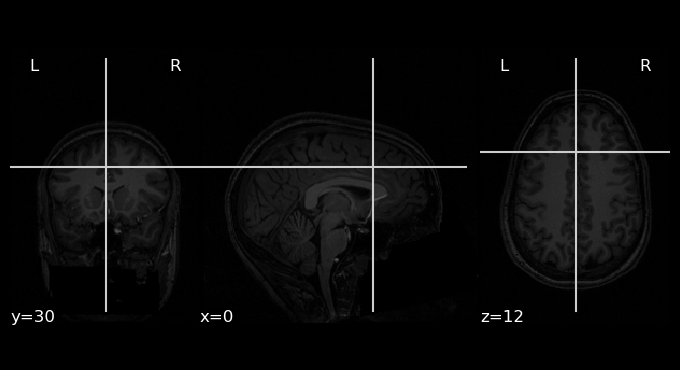

In [147]:
plotting.plot_anat(anat, cut_coords= [0,30,12])

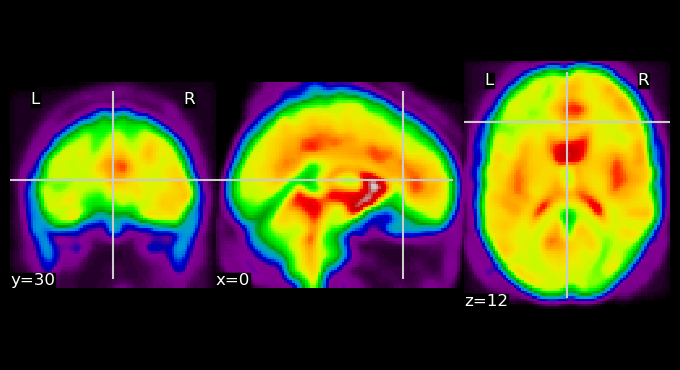

In [159]:
 plotting.plot_epi(mean_img(func), cut_coords = [0, 30, 12])

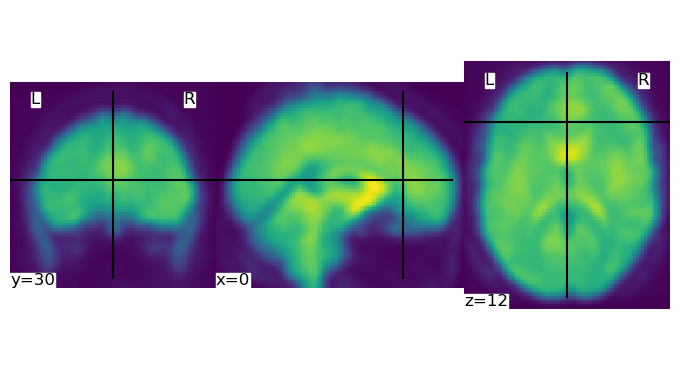

In [161]:
 plotting.plot_img(mean_img(func), cut_coords = [0, 30, 12])

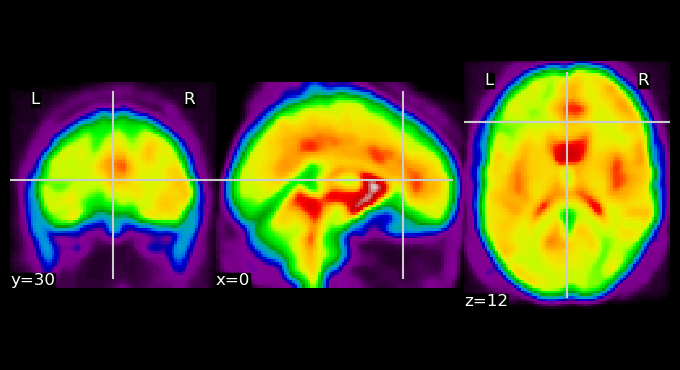

In [171]:
 plotting.plot_epi(mean_img(index_img(func, 3)), cut_coords = [0, 30, 12])

In [177]:
print(func.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  79  95  79 146   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  2.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Warped - conv(8,8,8)'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 78.0
qoffset_y       : -112.0
qoffset_z       : -70.0
srow_x          : [-2

### Affine meaning:

a. Transform space

b. Applying mask

c. Register the data

In [183]:
func.affine

array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -70.],
       [   0.,    0.,    0.,    1.]])

In [181]:
### Shape meaning:
#(x,y,z, time)
func.shape


(79, 95, 79, 146)

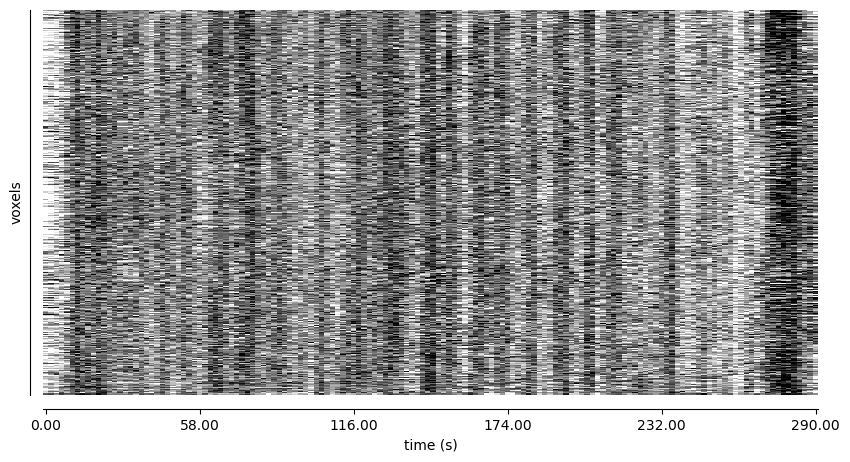

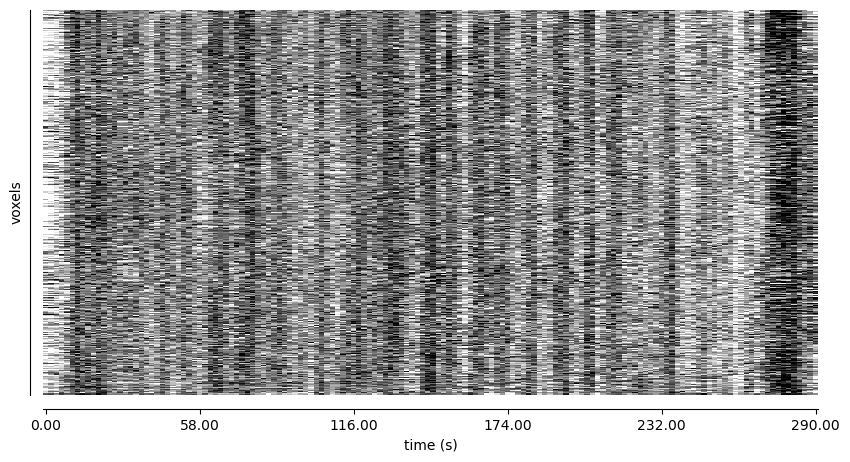

In [185]:
plotting.plot_carpet(func, t_r = 2)

In [187]:
func2 = func.get_fdata()

<Axes: >

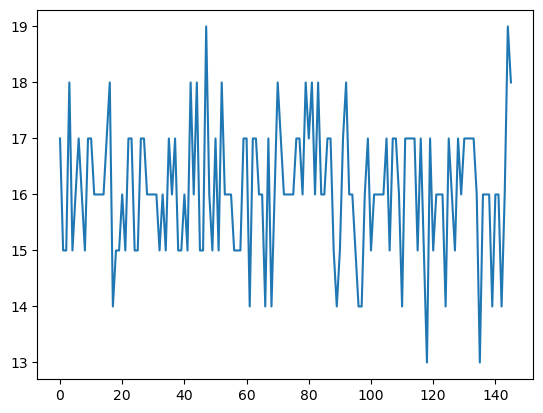

In [193]:
sns.lineplot(func2[0, 30, 12, :])

##scale of y axis: what the regular number?

In [215]:
len(func2[0, 30, 12, :])

146

In [201]:
func2.max()

1034.0

In [207]:
events = pd.read_table('sub-08_func_sub-08_task-flanker_run-1_events.tsv')

In [209]:
events

,onset,duration,trial_type,response_time,correctness,StimVar,Rsponse,Stimulus,cond
0,0.0,2.0,incongruent_correct,1.204,correct,2,1,incongruent,cond003
1,10.0,2.0,incongruent_correct,0.808,correct,2,1,incongruent,cond003
2,20.0,2.0,incongruent_correct,0.699,correct,2,1,incongruent,cond003
3,32.0,2.0,congruent_correct,0.567,correct,1,1,congruent,cond001
4,42.0,2.0,congruent_correct,0.490,correct,1,1,congruent,cond001
5,52.0,2.0,incongruent_correct,0.837,correct,2,1,incongruent,cond003
6,64.0,2.0,congruent_correct,0.592,correct,1,1,congruent,cond001
7,76.0,2.0,congruent_correct,0.411,correct,1,1,congruent,cond001
8,88.0,2.0,incongruent_correct,0.646,correct,2,1,incongruent,cond003
9,102.0,2.0,congruent_correct,0.463,correct,1,1,congruent,cond001


C:\Users\ASUS\anaconda3\lib\site-packages\nilearn\glm\first_level\experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: cond, Rsponse, StimVar, correctness, Stimulus, response_time
  warnings.warn(


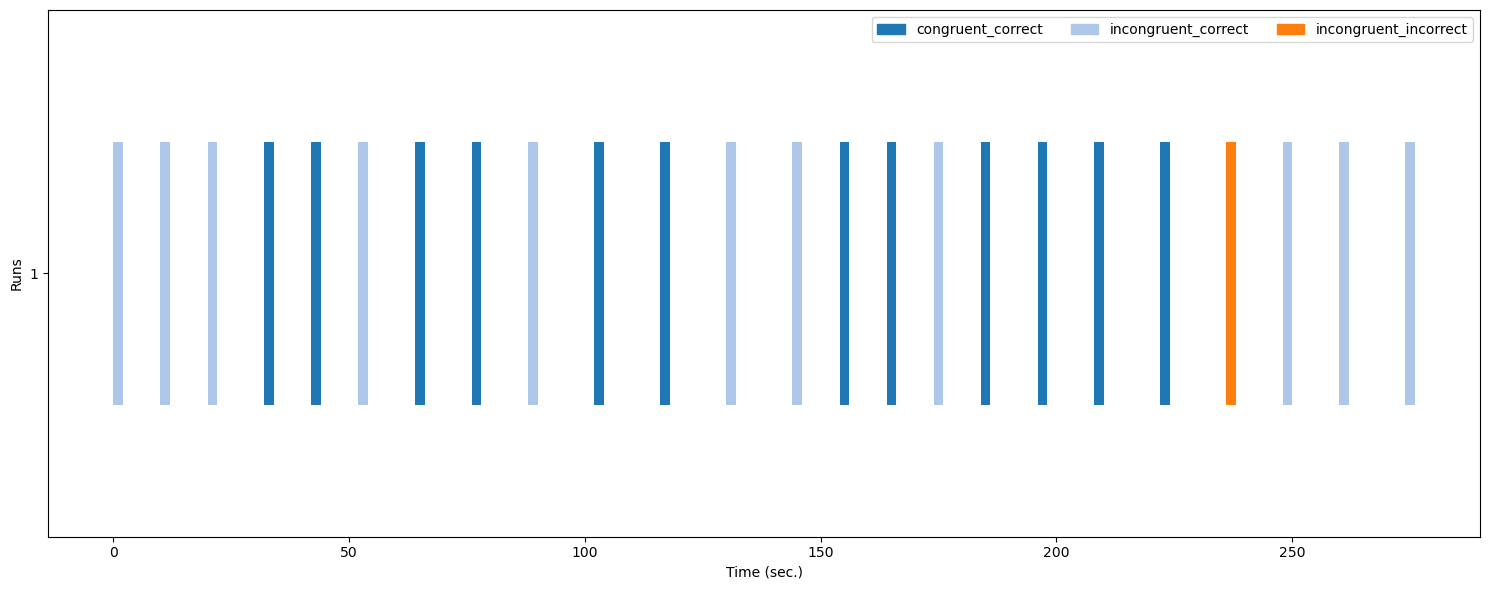

In [213]:
plotting.plot_event(events, figsize = (15,6))
plt.show()